In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
!pip install ngboost
from ngboost import NGBRegressor
from ngboost.distns import Exponential, Normal, LogNormal
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=73f23bb02477a5a074b43b6d2bd3cfa4155cb5a066c88cb5598e699878a63323
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
Mounted at /content/drive


In [ ]:
# Load the data
fatigue_df = pd.read_csv('/content/drive/MyDrive/Datasets/Carbon_Bending_UC.csv')
fatigue_df

# Removing rows with null values
fatigue_df = fatigue_df.dropna()

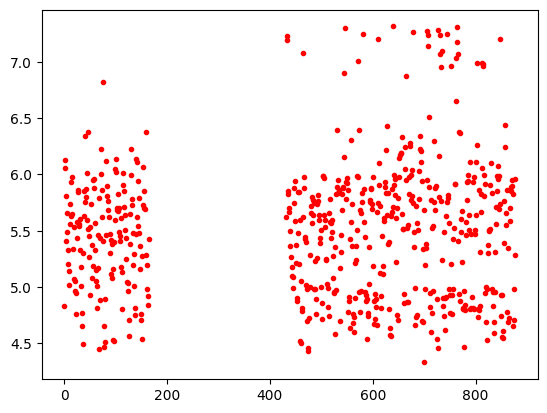

In [ ]:
# Scatter Plot for the Target Column
plt.plot(np.log10(fatigue_df['Number of Cycles']), 'r.')

# Sort the data by ascending order of number of cycles
fatigue_df.sort_values(by=['Number of Cycles'], ascending=True, ignore_index=True, inplace=True)

In [ ]:
# Remove columns that are not needed
drop_cols = ['Heat','Number of Cycles','Dataset'] # list the columns to drop along with target for independent feautures

# Use all remaining columns as features
features = fatigue_df.drop(drop_cols, axis=1)

# Use log transform of the number of cycles as targets
targets = np.log10(fatigue_df['Number of Cycles'])

# Display the features
features

,Stress (Mpa),Temperature (°C),Reduction Ratio,dA,dB,dC,Frequency,Elongation,Reduction of Area,C,Si,Mn,P,S,Ni,Cr,Cu
0,460,650,1270,0.04,0.01,0.00,50.0,29,70,0.42,0.26,0.70,0.024,0.010,0.01,0.01,0.01
1,500,550,825,0.11,0.04,0.00,50.0,23,67,0.42,0.22,0.78,0.022,0.020,0.01,0.02,0.03
2,470,550,825,0.08,0.00,0.00,50.0,22,68,0.33,0.21,0.75,0.031,0.019,0.01,0.03,0.02
3,580,550,825,0.10,0.00,0.00,50.0,22,60,0.54,0.20,0.75,0.013,0.019,0.01,0.01,0.01
4,480,550,825,0.11,0.04,0.00,50.0,23,67,0.42,0.22,0.78,0.022,0.020,0.01,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,520,550,1270,0.08,0.01,0.00,50.0,19,58,0.54,0.26,0.76,0.022,0.021,0.02,0.12,0.01
607,480,550,825,0.10,0.00,0.00,50.0,22,60,0.54,0.20,0.75,0.013,0.019,0.01,0.01,0.01
608,450,600,1740,0.07,0.00,0.00,50.0,22,64,0.45,0.25,0.79,0.018,0.016,0.02,0.13,0.13
609,530,550,610,0.08,0.00,0.04,50.0,16,50,0.54,0.27,0.70,0.017,0.020,0.06,0.10,0.22


In [ ]:
# Convert the features into floats
features = features.astype('float64')

In [ ]:
# Calculate the coverage percentage of values within a specified range
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y>yL)&(y<yH)))

Run # 1 Fold # 1
[iter 0] loss=0.8488 val_loss=0.9959 scale=1.0000 norm=0.4889
[iter 100] loss=0.6456 val_loss=0.8312 scale=1.0000 norm=0.4139
[iter 200] loss=0.4954 val_loss=0.7128 scale=1.0000 norm=0.3993
[iter 300] loss=0.3684 val_loss=0.6238 scale=1.0000 norm=0.3987
[iter 400] loss=0.2517 val_loss=0.5756 scale=1.0000 norm=0.4019
== Early stopping achieved.
== Best iteration / VAL472 (val_loss=0.5588)
Pearson CC: 0.7081047056129961
R2 score: 0.4688345532031033
RMSE: 0.4597930030267986
MAE: 0.30843027748703244
Coverage: 92.68292682926825
Upper coverage: 98.37398373983736
Lower coverage: 94.30894308943085
Average Interval Width: 1.4838516724898463
Median Interval Width: 1.4054305436297296
Composite Metric: 0.8730033848721053


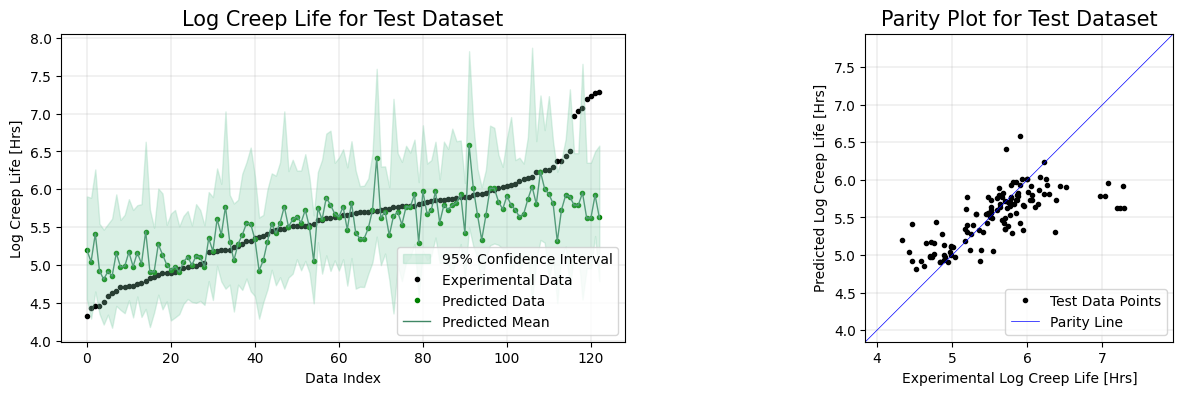

Run # 1 Fold # 2
[iter 0] loss=0.8473 val_loss=1.0915 scale=1.0000 norm=0.4940
[iter 100] loss=0.6488 val_loss=0.9349 scale=1.0000 norm=0.4256
[iter 200] loss=0.4677 val_loss=0.8105 scale=1.0000 norm=0.4202
== Early stopping achieved.
== Best iteration / VAL296 (val_loss=0.7702)
Pearson CC: 0.8041185030564912
R2 score: 0.5201541333946497
RMSE: 0.41999512269830475
MAE: 0.3067222725612218
Coverage: 92.62295081967217
Upper coverage: 97.54098360655742
Lower coverage: 95.0819672131148
Average Interval Width: 1.6275785157871017
Median Interval Width: 1.640017352863056
Composite Metric: 0.8471095425953916


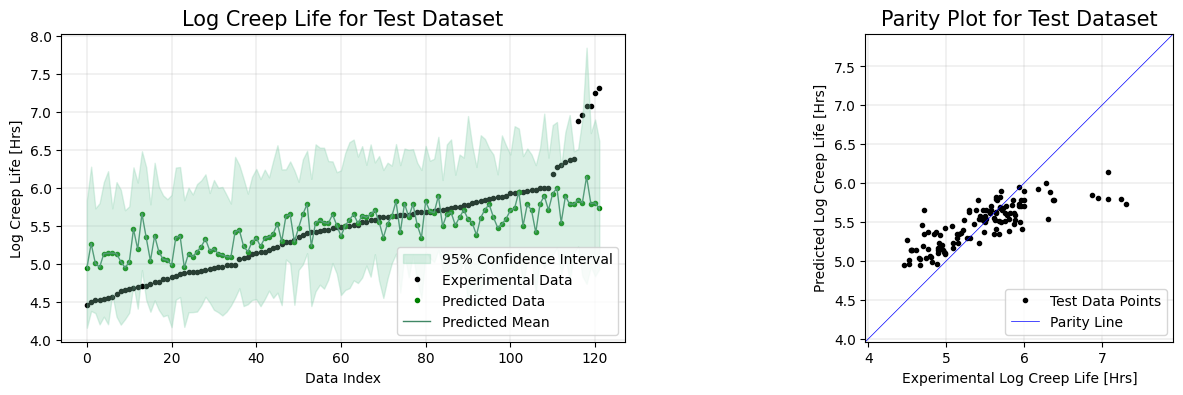

Run # 1 Fold # 3
[iter 0] loss=0.8541 val_loss=1.0908 scale=1.0000 norm=0.4922
[iter 100] loss=0.6536 val_loss=0.8593 scale=1.0000 norm=0.4274
[iter 200] loss=0.5071 val_loss=0.7431 scale=1.0000 norm=0.4164
[iter 300] loss=0.3787 val_loss=0.6557 scale=1.0000 norm=0.4108
[iter 400] loss=0.2788 val_loss=0.6073 scale=1.0000 norm=0.4132
== Early stopping achieved.
== Best iteration / VAL441 (val_loss=0.5937)
Pearson CC: 0.7736147862459183
R2 score: 0.5172335908608116
RMSE: 0.4103068595658635
MAE: 0.30789239908198157
Coverage: 95.90163934426234
Upper coverage: 100.00000000000004
Lower coverage: 95.90163934426234
Average Interval Width: 1.4903981003580435
Median Interval Width: 1.4497114857413935
Composite Metric: 0.8917104011078008


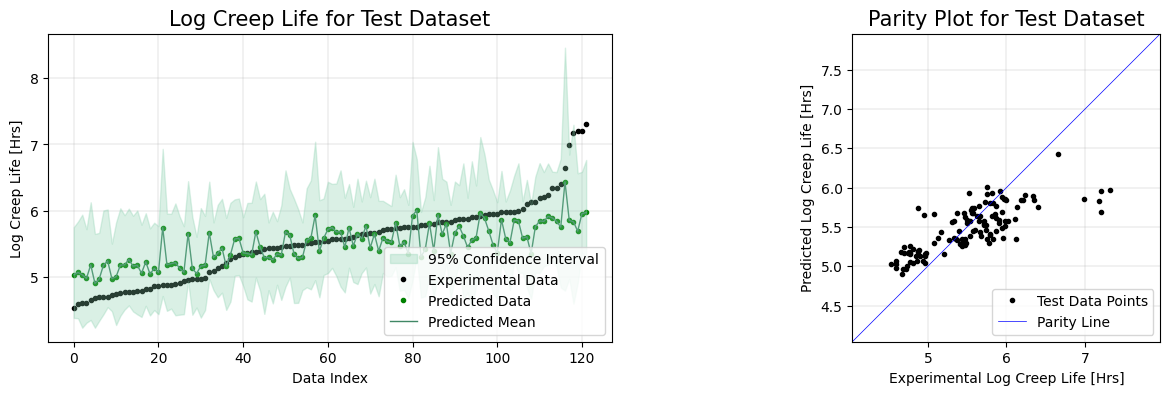

Run # 1 Fold # 4
[iter 0] loss=0.8724 val_loss=1.1047 scale=1.0000 norm=0.5101
[iter 100] loss=0.6669 val_loss=0.9096 scale=1.0000 norm=0.4310
[iter 200] loss=0.5002 val_loss=0.8005 scale=2.0000 norm=0.8241
[iter 300] loss=0.3579 val_loss=0.7128 scale=1.0000 norm=0.4085
[iter 400] loss=0.2593 val_loss=0.6500 scale=1.0000 norm=0.4053
[iter 500] loss=0.1660 val_loss=0.6089 scale=1.0000 norm=0.4030
[iter 600] loss=0.0827 val_loss=0.5618 scale=1.0000 norm=0.4024
== Early stopping achieved.
== Best iteration / VAL646 (val_loss=0.5522)
Pearson CC: 0.8290918903336758
R2 score: 0.6482876092081722
RMSE: 0.319884633360881
MAE: 0.2262999235990754
Coverage: 92.62295081967217
Upper coverage: 96.72131147540988
Lower coverage: 95.90163934426234
Average Interval Width: 1.2209632611097858
Median Interval Width: 1.1920553039274218
Composite Metric: 0.9043939445368481


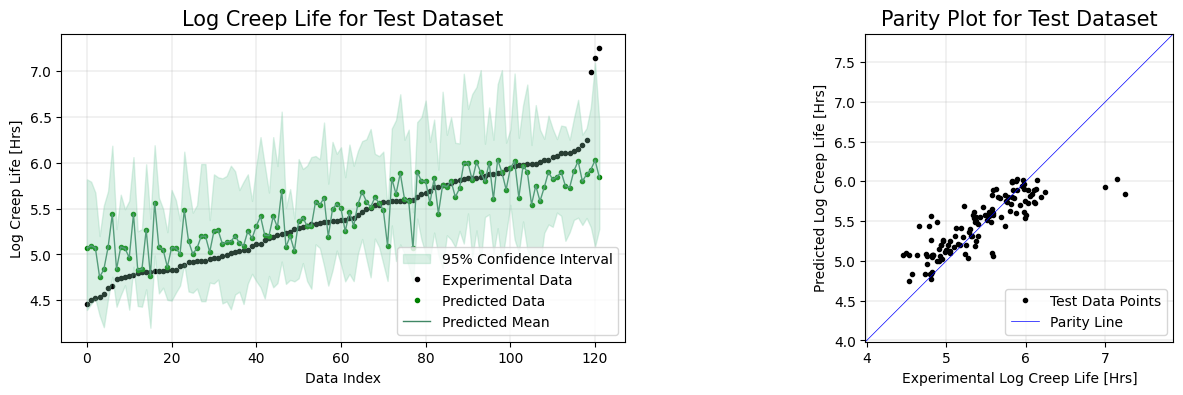

Run # 1 Fold # 5
[iter 0] loss=0.8301 val_loss=1.0912 scale=1.0000 norm=0.4861
[iter 100] loss=0.6316 val_loss=0.9016 scale=1.0000 norm=0.4234
[iter 200] loss=0.4891 val_loss=0.8070 scale=1.0000 norm=0.4056
[iter 300] loss=0.3613 val_loss=0.7465 scale=1.0000 norm=0.4020
[iter 400] loss=0.2589 val_loss=0.7131 scale=1.0000 norm=0.4058
== Early stopping achieved.
== Best iteration / VAL445 (val_loss=0.7036)
Pearson CC: 0.7600786815167782
R2 score: 0.5000616314511118
RMSE: 0.45801041455588687
MAE: 0.31913600526829927
Coverage: 90.98360655737709
Upper coverage: 97.54098360655742
Lower coverage: 93.44262295081971
Average Interval Width: 1.4637397127735219
Median Interval Width: 1.340939903313521
Composite Metric: 0.8688134430725817


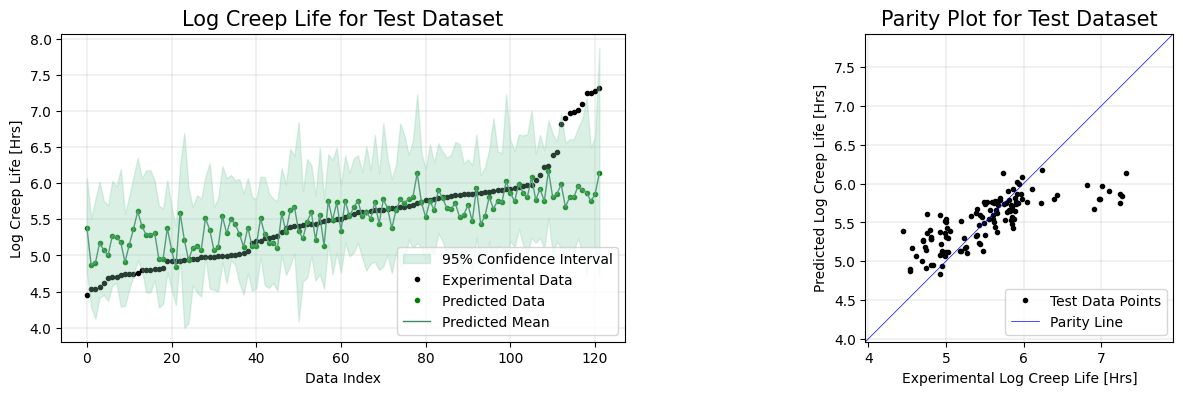

In [ ]:
# Evaluate multiple runs of the model
nruns = 1
nfolds = 5

# Metrics for performance evaluation
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)
MAPE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
upper_coverage = np.zeros_like(PearsonCC)
lower_coverage = np.zeros_like(PearsonCC)
mean_interval_width = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)
for j in range(nruns):

        kf = KFold(n_splits=nfolds, shuffle=True, random_state=66+j)

        for i, (tr, ts) in enumerate(kf.split(targets)):

            # Display the run number
            print('Run #', j+1, "Fold #", i+1)

            X_train, X_test = features.iloc[tr], features.iloc[ts]
            y_train, y_test = targets[tr], targets[ts]
            X_train, X_val, y_train, Y_val =train_test_split(X_train, y_train, test_size=0.2, random_state=42)


            model = NGBRegressor(Dist=LogNormal, n_estimators=1000, learning_rate=0.005)

            model.fit(X_train, y_train, X_val=X_val, Y_val=Y_val, early_stopping_rounds=4)

            y_pred_test = model.predict(X_test)

            y_test_ngb = model.pred_dist(X_test)

            PearsonCC[j, i] = pearsonr(y_test, y_pred_test)[0]
            R2_score[j, i] = r2_score(y_test, y_pred_test)
            RMSE[j, i] = sqrt(mean_squared_error(y_pred_test, y_test))
            MAE[j, i] = np.mean(abs(y_pred_test-y_test))

            print(f'Pearson CC: {PearsonCC[j, i]}')
            print(f'R2 score: {R2_score[j, i]}')
            print(f'RMSE: {RMSE[j, i]}')
            print(f'MAE: {MAE[j, i]}')

            df_test_low = y_test_ngb.interval(0.95)[0]
            df_test_median = y_pred_test
            df_test_high = y_test_ngb.interval(0.95)[1]

            test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)
            upper_coverage[j, i] = coverage(y_test, df_test_low, np.inf)
            lower_coverage[j, i] = coverage(y_test, -np.inf, df_test_high)

            print(f'Coverage: {test_coverage[j, i]}')
            print(f'Upper coverage: {upper_coverage[j, i]}')
            print(f'Lower coverage: {lower_coverage[j, i]}')

            # Prediction interval width
            mean_interval_width[j, i] = np.mean(df_test_high - df_test_low)
            print(f'Average Interval Width: {mean_interval_width[j, i]}')
            median_interval_width[j, i] = np.median(df_test_high - df_test_low)
            print(f'Median Interval Width: {median_interval_width[j, i]}')

            # Composite metric that combines the coverage and the invers of interval width
            composite_metric[j, i] = 0.75*test_coverage[j, i]/100 + 0.25*(1/median_interval_width[j, i])
            print(f'Composite Metric: {composite_metric[j, i]}')

            # Plot the predictions
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
            iteration_list = [i for i in range(len(y_test))]

            y_pred = y_pred_test
            y_std = np.std(np.array(y_pred_test), axis=0)

            ## Uncertainty quantification plot
            ax[0].fill_between(iteration_list, df_test_low, df_test_high, alpha=0.3, color='#86cfac', zorder=5, label='95% Confidence Interval')
            ax[0].plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
            ax[0].plot(iteration_list, y_pred, 'go', markersize=3, label="Predicted Data")
            ax[0].plot(iteration_list, y_pred, '-', linewidth=1, color="#408765", label="Predicted Mean")
            ax[0].legend(loc=4, fontsize=10, frameon=True)
            ax[0].set_xlabel("Data Index", fontsize=10)
            ax[0].set_ylabel("Log Creep Life [Hrs]", fontsize=10)
            ax[0].set_title("Log Creep Life for Test Dataset", fontsize=15)
            ax[0].grid(True, which='major', linestyle='-', linewidth='0.25')

            ## Parity Plot
            # find the boundaries of y_test and y_pred values
            bounds = (min(y_test.min(), y_pred.min()) - 0.1*y_pred.min(), max(y_test.max(), y_pred.max())+ 0.1 * y_pred.max())
            ax[1].plot(y_test, y_pred, 'ko', markersize=3, label="Test Data Points")
            ax[1].legend(loc=4, fontsize=10, frameon=False)
            ax[1].plot([bounds[0], bounds[1]], [bounds[0], bounds[1]],'b-', linewidth=0.5, label="Parity Line") # identity line
            ax[1].legend(loc=4, fontsize=10, frameon=True)
            ax[1].set_xlabel("Experimental Log Creep Life [Hrs]", fontsize=10)
            ax[1].set_ylabel("Predicted Log Creep Life [Hrs]", fontsize=10)
            ax[1].set_title("Parity Plot for Test Dataset", fontsize=15)
            ax[1].grid(True, which='major', linestyle='-', linewidth='0.25')
            ax[1].set_xlim(bounds)
            ax[1].set_ylim(bounds)
            ax[1].set_aspect("equal", adjustable="box") # Square aspect ratio

            plt.show()

In [ ]:
# Data frame
df1 = pd.DataFrame({'Pearson CC': PearsonCC.flatten(), 'R2 Score': R2_score.flatten(), 'RMSE': RMSE.flatten(),
                    'MAE': MAE.flatten(), 'Coverage': test_coverage.flatten()},index=None)
df1

,Pearson CC,R2 Score,RMSE,MAE,Coverage
0,0.708105,0.468835,0.459793,0.308430,92.682927
1,0.804119,0.520154,0.419995,0.306722,92.622951
2,0.773615,0.517234,0.410307,0.307892,95.901639
3,0.829092,0.648288,0.319885,0.226300,92.622951
4,0.760079,0.500062,0.458010,0.319136,90.983607


In [ ]:
# Calculate mean values and standard deviations of the scores
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
test_coverage_mean = np.mean(test_coverage)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
test_coverage_std = np.std(test_coverage)

# Data frame
df2 = pd.DataFrame({'Pearson CC Mean': PearsonCC_mean, 'Pearson CC Std': PearsonCC_std, 'R2 Score Mean': R2_score_mean, 'R2 Score Std': R2_score_std,
                  'RMSE Mean': RMSE_mean, 'RMSE Std': RMSE_std, 'MAE Mean': MAE_mean, 'MAE Std':MAE_std,
                   'RMSE Std': RMSE_std, 'Test Coverage Mean': test_coverage_mean, 'Test Coverage Std':test_coverage_std},index=[0])
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,Test Coverage Mean,Test Coverage Std
0,0.775002,0.041166,0.530914,0.061458,0.413598,0.050873,0.293696,0.033993,92.962815,1.603952


In [ ]:
# Data frame
df3 = pd.DataFrame({'Coverage': test_coverage.flatten(), 'Upper Coverage': upper_coverage.flatten(), 'Lower Coverage': lower_coverage.flatten(),
                    'Mean Interval Width': mean_interval_width.flatten(), 'Median Interval Width': median_interval_width.flatten(), 'Composite Metric': composite_metric.flatten()},index=None)
df3

,Coverage,Upper Coverage,Lower Coverage,Mean Interval Width,Median Interval Width,Composite Metric
0,92.682927,98.373984,94.308943,1.483852,1.405431,0.873003
1,92.622951,97.540984,95.081967,1.627579,1.640017,0.847110
2,95.901639,100.000000,95.901639,1.490398,1.449711,0.891710
3,92.622951,96.721311,95.901639,1.220963,1.192055,0.904394
4,90.983607,97.540984,93.442623,1.463740,1.340940,0.868813


In [ ]:
# Calculate mean values and standard deviations of the scores
test_coverage_mean = np.mean(test_coverage)
upper_coverage_mean = np.mean(upper_coverage)
lower_coverage_mean = np.mean(lower_coverage)
mean_interval_width_mean = np.mean(mean_interval_width)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
upper_coverage_std = np.std(upper_coverage)
lower_coverage_std = np.std(lower_coverage)
mean_interval_width_std = np.std(mean_interval_width)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

# Data frame
df4 = pd.DataFrame({'Coverage Mean': test_coverage_mean, 'Coverage Std': test_coverage_std, 'Upper Coverage Mean': upper_coverage_mean, 'Upper Coverage Std': upper_coverage_std,
                  'Lower Coverage Mean': lower_coverage_mean, 'Lower Coverage Std': lower_coverage_std,
                    'Mean Interval Width Mean': mean_interval_width_mean, 'Mean Interval Width Std':mean_interval_width_std,
                    'Median Interval Width Mean': median_interval_width_mean, 'Median Interval Width Std':median_interval_width_std,
                   'Composite Metric Mean': composite_metric_mean, 'Composite Metric Std': composite_metric_std,},index=[0])
df4

,Coverage Mean,Coverage Std,Upper Coverage Mean,Upper Coverage Std,Lower Coverage Mean,Lower Coverage Std,Mean Interval Width Mean,Mean Interval Width Std,Median Interval Width Mean,Median Interval Width Std,Composite Metric Mean,Composite Metric Std
0,92.962815,1.603952,98.035452,1.112656,94.927362,0.949655,1.457306,0.131675,1.405631,0.146068,0.877006,0.019714
